<a href="https://colab.research.google.com/github/saykim/pyML/blob/master/Keras_iris_get_dummies.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
#Keras basic library
import pandas as pd, numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import tensorflow as tf

from keras.models import Sequential
from keras.layers import Dense
from keras.utils import np_utils
from sklearn.preprocessing import LabelEncoder

Using TensorFlow backend.


In [0]:
df = sns.load_dataset('iris')

In [4]:
df.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
sepal_length    150 non-null float64
sepal_width     150 non-null float64
petal_length    150 non-null float64
petal_width     150 non-null float64
species         150 non-null object
dtypes: float64(4), object(1)
memory usage: 5.9+ KB


In [0]:
dataset = df.values

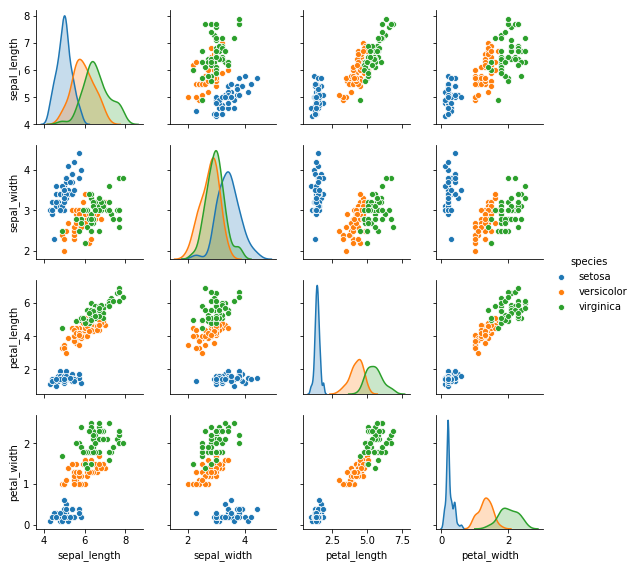

In [32]:
sns.pairplot(df, hue='species', height=2,aspect=1)

In [0]:
X = dataset[:,:4]
Y_obj = dataset[:,4]

In [0]:
e = LabelEncoder()
y1 = e.fit_transform(Y_obj)
Y=pd.get_dummies(y1).values


In [8]:
model = Sequential()
model.add(Dense(16, input_dim=4, activation='relu'))
model.add(Dense(3, activation='softmax'))

model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
model.fit(X, Y, epochs=100, batch_size=3)

W0712 02:41:57.749660 140710813443968 deprecation.py:323] From /usr/local/lib/python3.6/dist-packages/tensorflow/python/ops/math_grad.py:1250: add_dispatch_support.<locals>.wrapper (from tensorflow.python.ops.array_ops) is deprecated and will be removed in a future version.
Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where
W0712 02:41:57.794206 140710813443968 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:986: The name tf.assign_add is deprecated. Please use tf.compat.v1.assign_add instead.



Epoch 1/100
150/150 [==============================] - 1s 10ms/step - loss: 3.1960 - acc: 0.3333
Epoch 2/100
150/150 [==============================] - 0s 1ms/step - loss: 1.8262 - acc: 0.3333
Epoch 3/100
150/150 [==============================] - 0s 965us/step - loss: 1.0878 - acc: 0.4067
Epoch 4/100
150/150 [==============================] - 0s 1ms/step - loss: 0.8671 - acc: 0.7267
Epoch 5/100
150/150 [==============================] - 0s 960us/step - loss: 0.7719 - acc: 0.6600
Epoch 6/100
150/150 [==============================] - 0s 978us/step - loss: 0.6960 - acc: 0.7867
Epoch 7/100
150/150 [==============================] - 0s 921us/step - loss: 0.6382 - acc: 0.9067
Epoch 8/100
150/150 [==============================] - 0s 930us/step - loss: 0.5892 - acc: 0.8200
Epoch 9/100
150/150 [==============================] - 0s 1000us/step - loss: 0.5520 - acc: 0.8600
Epoch 10/100
150/150 [==============================] - 0s 923us/step - loss: 0.5220 - acc: 0.7533
Epoch 11/100
150/150 [=

In [9]:
print(model.evaluate(X,Y)[1])

150/150 [==============================] - 0s 361us/step
0.9733333333333334


In [10]:
test_set = np.array([[7, 3.0, 5, 1.4]])
model.predict_classes(test_set)

array([1])

In [11]:
#예측값
df['species'].unique()[model.predict_classes(test_set)]

array(['versicolor'], dtype=object)